#  *Convergence of Sequences*

The purpose of this project is to develop a ***quick and dirty*** way of investigating the convergence of schemes under the condition that the *exact* solution is available.

As the text says, the general idea is to study how a method converges for a particular type of problem when the solution is known in order to guide us in learning how the scheme handles more delicate cases.

We are essentially dealing with what is known as the **method of manufactured solutions** which is a verification approach for code. 

## Some Definitions and Notation

* **Convergence of Sequences**. Let $\{z_n\}\subset\mathbb{R}$ and $z\in\mathbb{R}$. We say that $\{z_n\}$ converges to $z$ if for every $\epsilon>0$ there exists an integer $N$ such that for all $n\geq N$, 
$$ \large |z_n-z| < \epsilon.$$
If $\{z_n\}$ converges to $z$, then we write either 
$$\large \lim_{n\to\infty} z_n=z, \ \text{ or more simply } \ z_n\to z.$$


* **Rate of Convergence**. Let $\{z_n\}\subset\mathbb{R}$ and $z\in\mathbb{R}$. We say that $z_n\to z$ with the rate $\alpha\in\mathbb{R}$ if there exists a constant $c\in\mathbb{R}$ (not depending on $n$) such that
$$ \large |z_n-z| \leq c\left(\frac{1}{n}\right)^\alpha. $$
If $\alpha=1$, we say that the rate of convergence is either first-order or linear.
If $\alpha=2$, we say that the rate of convergence is either second-order of quadratic.
You should get the idea for $\alpha > 2$.


* ***Superlinear Convergence***. We say that a sequence $\{z_n\}\subset\mathbb{R}$ converges superlinearly towards $z\in\mathbb{R}$ if there is a positive sequence of real numbers $\{c_n\}$ such that $c_n\to 0$ and $|z_n-z| \leq c_n/n$.


* ***The $O$-Notation ("Big-Oh" Notation)***. Let $\{y_n\}$ and $\{z_n\}$ be two sequences of positive real numbers. If there is a finite constant $c$, not depending on $n$, such that 
$$\large y_n \leq cz_n \ \ \ \forall \ n\geq 1,$$
we say that the sequence $\{y_n\}$ is of order $\{z_n\}$, and we write, 
$$\large y_n=O(z_n).$$

## To Do: (out-of-class)

Show that the above definition of convergence is roughly equivalent to the definition in lecture, namely that if $e_n = z_n -z$, then the sequence converges with rate $\alpha$ if

$$|e_n| \leq C |e_{n-1}|^\alpha,$$ where again the constant $C$ does not depend on $n$ or $\alpha$.


### Part (a): Estimating the rate of convergence for some sequences.

1. $z_n = \sqrt{1/n}$

2. $z_n = \sin(1/n)$

3. $z_n = \sqrt{1/n} \sin^2(1/n)$

4. $z_n = n(e^{(1/n)} - 1 - 1/n)$

We first must determine the limit, which is not always obvious. 
Plots are useful tools.
We therefore first make use of the ``numpy`` and ``matplotplib`` libraries to develop some intuition about these sequences.
Below, we proceed in the following steps:

  i. We import ``numpy`` and ``matplotlib`` (and also enable plotting within this notebook)
    
  ii. We generate plots of the sequences to help numerically "guess" at the limits (assuming they exist). Some of these are obvious, but others are less so.
    
  iii. Once we determine the appropriate limit $z$ in each case. We note that taking logarithms of both sides of the inequality in the definition of rate of convergence yields
    $$\large \ln |z_n-z| \leq \alpha \ln (c/n) = \alpha (\ln c + \ln (1/n)). $$
   Thus, we can perform regression using ``polyfit`` within ``numpy`` (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html for more info) to fit a line to the logarithm of $|z_n-z|$ and $1/n$ and take the slope of that line to get an estimate of the rate of convergence.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

Rule of Thumb is that 
$$
\alpha \approx \frac{\log e_{n+1} - \log{e_n}}{\log e_{n}-\log e_{n-1}}
$$.
Where we use $e_{i} \approx x_i - x_{i-i}$.

In [3]:
def rofthumb(sequence):
    enplus1=np.absolute(sequence[-1]-sequence[-2])
    en=np.absolute(sequence[-2]-sequence[-3])
    enminus1=np.absolute(sequence[-3]-sequence[-4])
    return (np.log(enplus1)-np.log(en))/(np.log(en)-np.log(enminus1))

            

## To Do: 

* Make the rule of thumb more efficient and stable.

In [4]:
def rofthumb2(sequence):
    enplus1=sequence[-1]-sequence[-2]
    en=sequence[-2]-sequence[-3]
    enminus1=sequence[-3]-sequence[-4]
    return np.log(np.absolute(enplus1/en))/np.log(np.absolute(en/enminus1))

Step ii. First create parts of the sequences in the next two code blocks.

In [8]:
offset=1E2
n = np.linspace(1+offset,100+offset,100) #generate an array from 1 to 100 of floats
print(n)

[ 101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.
  113.  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.
  125.  126.  127.  128.  129.  130.  131.  132.  133.  134.  135.  136.
  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.  147.  148.
  149.  150.  151.  152.  153.  154.  155.  156.  157.  158.  159.  160.
  161.  162.  163.  164.  165.  166.  167.  168.  169.  170.  171.  172.
  173.  174.  175.  176.  177.  178.  179.  180.  181.  182.  183.  184.
  185.  186.  187.  188.  189.  190.  191.  192.  193.  194.  195.  196.
  197.  198.  199.  200.]


In [9]:
z1 = np.sqrt(1./n) #Seq. 1
z2 = np.sin(1./n) #Seq. 2
z3 = np.sqrt(1./n) * np.sin(1./n)**2 #Seq. 3
z4 = n * (np.exp(1./n) - 1 - 1./n) #Seq. 4
for sequences in (z1,z2,z3,z4):
    print(rofthumb2(sequences))
    

0.99497480017
0.994974916784
0.994974844996
0.994966084488


In [10]:
print(rofthumb2(z1))
print(rofthumb2(z2))

0.99497480017
0.994974916784


Step ii. Now plot the created sequences and infer the limits from the plots.

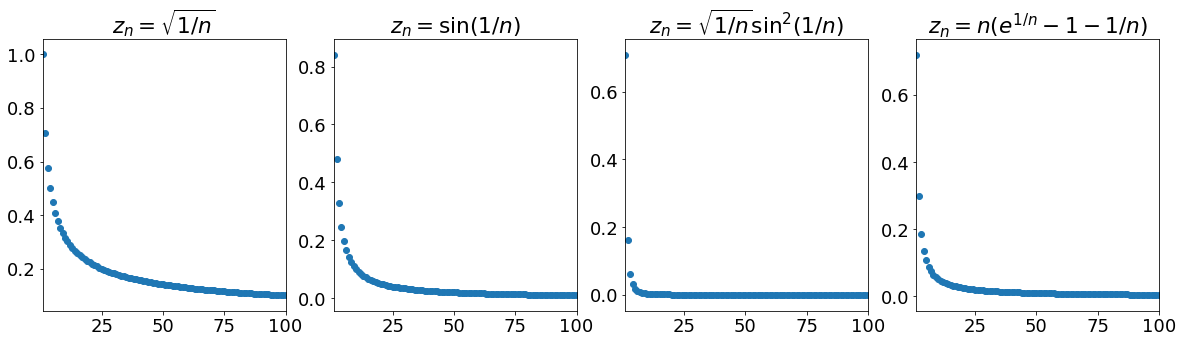

In [70]:
fig = plt.figure(1, figsize=(20,5)) #Make figure 1 size 5x20 

axes1 = fig.add_subplot(1, 4, 1) #1x4 array - subplot 1
axes2 = fig.add_subplot(1, 4, 2) #1x4 array - subplot 2
axes3 = fig.add_subplot(1, 4, 3) #1x4 array - subplot 3
axes4 = fig.add_subplot(1, 4, 4) #1x4 array - subplot 4

axes1.set_title('$z_n = \sqrt{1/n}$')
axes2.set_title('$z_n = \sin(1/n) $')
axes3.set_title('$z_n = \sqrt{1/n}\sin^2(1/n)$')
axes4.set_title('$z_n = n(e^{1/n} - 1 - 1/n)$')

axes1.set_xlim(1, 100)
axes2.set_xlim(1, 100)
axes3.set_xlim(1, 100)
axes4.set_xlim(1, 100)

axes1.scatter(n, z1)
axes2.scatter(n, z2)
axes3.scatter(n, z3)
axes4.scatter(n, z4)

Step iii. Use ``polyfit`` within ``numpy`` to determine the rate of convergence as discussed above.

In [71]:
z1_lim = 0.0 #Taken from previous plots
z2_lim = 0.0 #Taken from previous plots
z3_lim = 0.0 #Taken from previous plots
z4_lim = 0.0 #Taken from previous plots

z1_log = np.log(np.abs(z1 - z1_lim))
z2_log = np.log(np.abs(z2 - z2_lim))
z3_log = np.log(np.abs(z3 - z3_lim))
z4_log = np.log(np.abs(z4 - z4_lim))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)
line4_params = np.polyfit(np.log(1./n), z4_log, 1)

print("[slope, intercept] log-log line fit for z1 = ", line1_params)
print("[slope, intercept] log-log line fit for z2 = ", line2_params)
print("[slope, intercept] log-log line fit for z3 = ", line3_params)
print("[slope, intercept] log-log line fit for z4 = ", line4_params)

[slope, intercept] log-log line fit for z1 =  [  5.00000000e-01  -4.09659150e-16]
[slope, intercept] log-log line fit for z2 =  [ 0.98983053 -0.03977934]
[slope, intercept] log-log line fit for z3 =  [ 2.47966106 -0.07955868]
[slope, intercept] log-log line fit for z4 =  [ 1.03421047 -0.55095094]


Step iii. Create plots to visually confirm the rate of convergence.

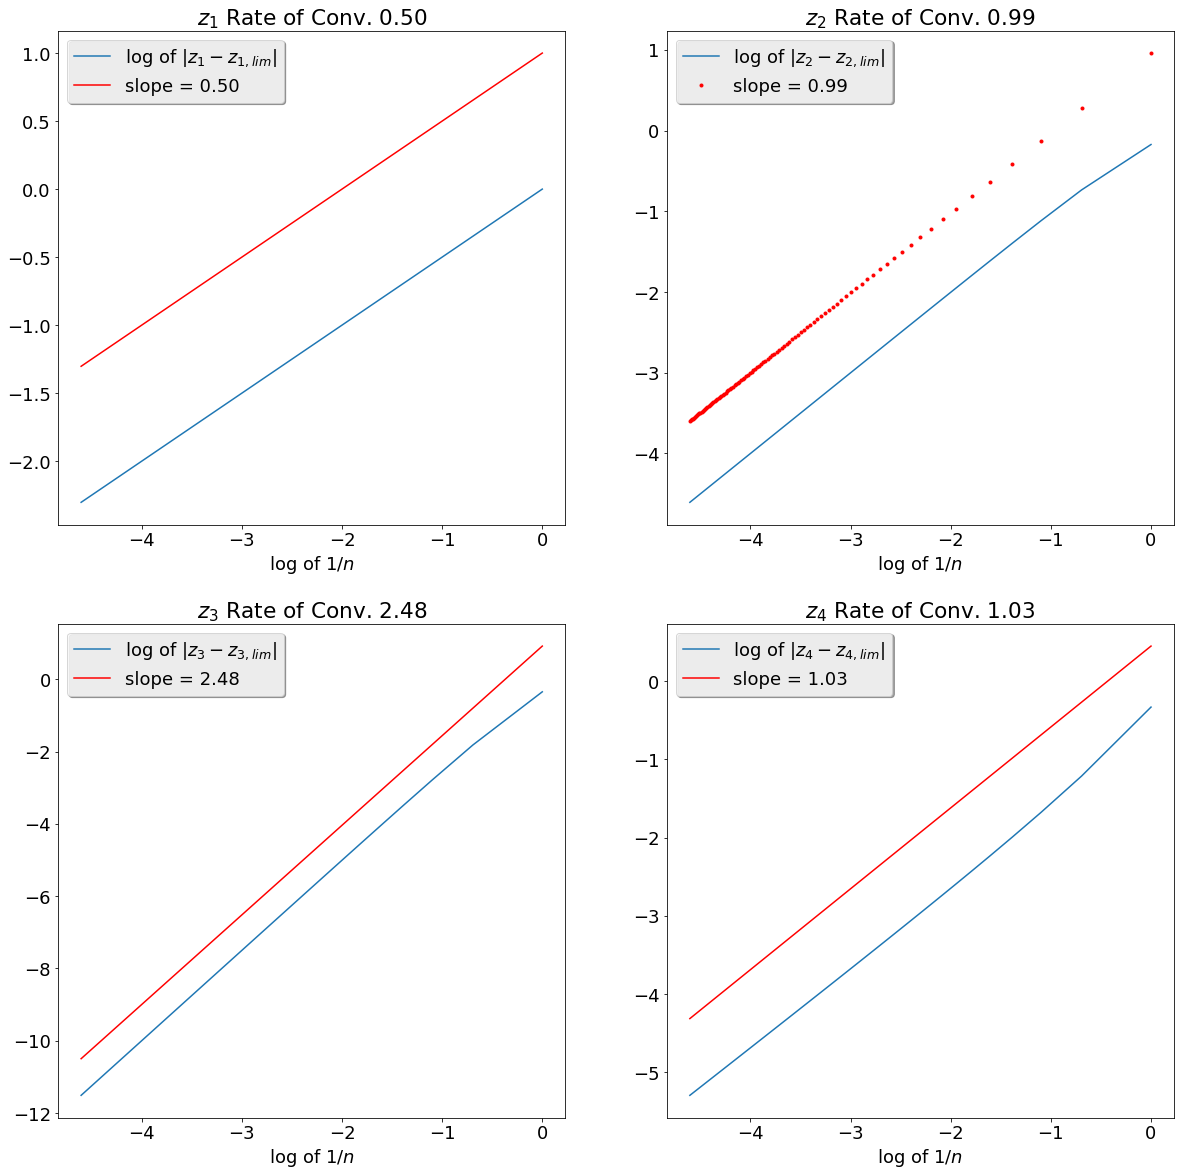

In [72]:
fig = plt.figure(2, figsize=(20,20))

axes1 = fig.add_subplot(2, 2, 1) #1x4 array - subplot 1
axes2 = fig.add_subplot(2, 2, 2) #1x4 array - subplot 2
axes3 = fig.add_subplot(2, 2, 3) #1x4 array - subplot 3
axes4 = fig.add_subplot(2, 2, 4) #1x4 array - subplot 4

axes1.plot(np.log(1./n), z1_log, label='log of $|z_1-z_{1,lim}|$')
slope_str = "{:1.2f}".format(line1_params[0]) 
axes1.plot(np.log(1./n), line1_params[0]*np.log(1./n)+line1_params[1]+1,
           'r', label='slope = ' + slope_str)
title_str = '$z_1$ Rate of Conv. ' + slope_str
axes1.set_title(title_str)
axes1.set_xlabel('log of $1/n$')
axes1.legend(loc='upper left', shadow=True)

axes2.plot(np.log(1./n), z2_log, label='log of $|z_2-z_{2,lim}|$')
slope_str = "{:1.2f}".format(line2_params[0]) 
axes2.plot(np.log(1./n), line2_params[0]*np.log(1./n)+line2_params[1]+1,
           'r.', label='slope = ' + slope_str)
title_str = '$z_2$ Rate of Conv. ' + slope_str
axes2.set_title(title_str)
axes2.set_xlabel('log of $1/n$')
axes2.legend(loc='upper left', shadow=True)

axes3.plot(np.log(1./n), z3_log, label='log of $|z_3-z_{3,lim}|$')
slope_str = "{:1.2f}".format(line3_params[0]) 
axes3.plot(np.log(1./n), line3_params[0]*np.log(1./n)+line3_params[1]+1,
           'r', label='slope = ' + slope_str)

title_str = '$z_3$ Rate of Conv. ' + slope_str
axes3.set_title(title_str)
axes3.set_xlabel('log of $1/n$')
axes3.legend(loc='upper left', shadow=True)

axes4.plot(np.log(1./n), z4_log, label='log of $|z_4-z_{4,lim}|$')
slope_str = "{:1.2f}".format(line4_params[0])
axes4.plot(np.log(1./n), line4_params[0]*np.log(1./n)+line4_params[1]+1,
           'r', label='slope = ' + slope_str) 
title_str = '$z_4$ Rate of Conv. ' + slope_str
axes4.set_title(title_str)
axes4.set_xlabel('log of $1/n$')
axes4.legend(loc='upper left', shadow=True)


## To Do:  

* Does this compare with the Rule of Thumb results?
* Can you envision where the "polynomial Fit" could be better?


### Part (b): Linear or superlinear convergence?

1. $\large z_n = 1/n$

2. $\large z_n = \frac{1}{n\log(n)}$

3. $\large z_n = \frac{e^{1/n}}{n}$

From the definition, it is quite clear that only the second sequence converges superlinearly. 
However, as we will see below when we replace $n$ with $h=1/n$, the logarithm can make detecting this quite difficult (try playing with the ``offset`` as mentioned below).
Moreover, it is perhaps unclear from the text on how to numerically test for superlinear convergence. 
Basically, we are looking for an $\alpha$ that is somewhere between $1$ and $2$. 
It is a good idea to test this for fairly large values of $n$ to let asymptotics take over. 
You may only want to test the tail end of a sequence which numerically means testing a segment of the tail that is sufficiently far from the beginning.

Below, we can test with various values of ``offset`` to conclude that the second sequence is superlinear in convergence but the first and third are not even though for an ``offset=0`` we may erroneously conclude that the third sequence is superlinearly convergent.

In [77]:
offset = 1E3
#offset=0

n = np.linspace(offset+1,offset+100,100)

z1 = 1./n
z2 = 1./((n+1)*np.log(n+1)) #This sequence must start at n=2 not n=1
z3 = np.exp(1./n)/(n)

z1_log = np.log(np.abs(z1))
z2_log = np.log(np.abs(z2))
z3_log = np.log(np.abs(z3))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)

print("rate of conv. for z1 = ", line1_params[0])
print("rate of conv. for z2 = ", line2_params[0])
print("rate of conv. for z3 = ", line3_params[0])

print(rofthumb(z2))

rate of conv. for z1 =  1.0
rate of conv. for z2 =  1.1426496335
rate of conv. for z3 =  1.0009529354
0.999080322928


### Part (c): Redux with $h=1/n$

When discretizing PDEs, we often let $h$ denote a spatial discretization parameter in a particular direction. 
If we use "regular" discretizations, then this means we specify a number of points in each direction to define a grid where the spacing of points in a particular direction is uniform, so then $h=1/n$. Thus, as $n\to\infty$, $h\to 0$, so all the definitions are easily changed by making the substitutions of $h$ for $1/n$ or $h\to 0$ for $n\to\infty$.
We now estimate the rates of convergence as $h\to 0$ for

1. $z_h = \sqrt{h}\sin(h)$

2. $z_h = \sqrt{h}\cos(h)$

3. $z_h = \sqrt{h} e^h$

4. $$z_h = \frac{ \cos{h} - 1}{h}$$.

In [76]:
h = 1./n

z1 = np.sqrt(h)*np.sin(h)
z2 = np.sqrt(h)*np.cos(h)
z3 = np.sqrt(h)*np.exp(h)

z1_log = np.log(np.abs(z1))
z2_log = np.log(np.abs(z2))
z3_log = np.log(np.abs(z3))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)

print("rate of conv. for z1 = ", line1_params[0])
print("rate of conv. for z2 = ", line2_params[0])
print("rate of conv. for z3 = ", line3_params[0])

print('rule of thumb for z1',rofthumb2(z1))
print('rule of thumb for z2',rofthumb2(z2))

rate of conv. for z1 =  1.49998319488
rate of conv. for z2 =  0.49994958391
rate of conv. for z3 =  0.50701639191
rule of thumb for z1 0.994974858122
rule of thumb for z2 0.994975648483


## What about #4?

In [63]:
z4 = (np.cos(h)-1)/h

z4_log = np.log(np.abs(z4))


line4_params = np.polyfit(np.log(1./n), z4_log, 1)


print("rate of conv. for z4 = ", line4_params[0])

print(z4)

rate of conv. for z4 =  0.999829813578
[-0.04542325 -0.04164256 -0.03844258 -0.0356991  -0.03332099 -0.03123983
 -0.02940328 -0.02777063 -0.02630972 -0.02499479 -0.02380502 -0.02272336
 -0.02173571 -0.02083032 -0.01999733 -0.0192284  -0.0185164  -0.01785524
 -0.01723967 -0.01666512 -0.01612763 -0.01562373 -0.01515036 -0.01470482
 -0.01428474 -0.013888   -0.01351269 -0.01315714 -0.01281981 -0.01249935
 -0.01219452 -0.0119042  -0.01162738 -0.01136315 -0.01111065 -0.01086914
 -0.0106379  -0.01041629 -0.01020373 -0.00999967 -0.00980361 -0.00961509
 -0.00943368 -0.00925899 -0.00909066 -0.00892833 -0.0087717  -0.00862048
 -0.00847437 -0.00833314 -0.00819654 -0.00806434 -0.00793634 -0.00781234
 -0.00769216 -0.00757561 -0.00746255 -0.00735281 -0.00724625 -0.00714274
 -0.00704214 -0.00694433 -0.00684921 -0.00675665 -0.00666657 -0.00657885
 -0.00649342 -0.00641017 -0.00632903 -0.00624992 -0.00617276 -0.00609749
 -0.00602402 -0.00595231 -0.00588229 -0.00581389 -0.00574706 -0.00568176
 -0.00561792